# AutoEncode

- 표현(특징) 학습
    - 데이터에서 주요 특징을 찾아 압축 후 복원하는 학습 모델
- 구성
    - 인코더(Encoder) : 입력 데이터에서 쥬요 특징 추출 / 압축
    - 디코더(Decoder) : 주요 특징에서 원 데이터로 복원

In [137]:
import tensorflow as tf

In [138]:
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import set_random_seed, plot_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt

## [1] 데이터 로딩

In [139]:
mnist = tf.keras.datasets.mnist.load_data()

In [140]:
x_train = mnist[0][0]
y_train = mnist[0][1]
x_test = mnist[1][0]
y_test = mnist[1][1]

## [2] 데이터 전처리

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.2,stratify=y_train)

In [143]:
x_train = x_train/255.0 # numpy 브로드캐스팅
x_val = x_val/255.0
x_test = x_test/255.0

In [144]:
x_train = x_train.reshape(-1,28*28)
x_val = x_val.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)

In [145]:
x_train.shape, x_val.shape, x_test.shape

((48000, 784), (12000, 784), (10000, 784))

## [3] 모델 생성

In [146]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [147]:
def createAEModel(n_node):
    model=Sequential()
    #입력
    model.add(Dense(units=n_node, activation='relu', input_shape=(784,)))
    #출력
    model.add(Dense(784,activation='sigmoid'))
    model.compile(optimizer='adam',loss='mse')
    return model

In [148]:
oneModel = createAEModel(1)

In [149]:
hundModel = createAEModel(100)

In [150]:
oneModel.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 1)                 785       
                                                                 
 dense_27 (Dense)            (None, 784)               1568      
                                                                 
Total params: 2,353
Trainable params: 2,353
Non-trainable params: 0
_________________________________________________________________


## [4] 모델 학습

In [151]:
# x, y값 모두 입력 데이터
oneModel.fit(x_train,x_train,epochs=10,verbose=0)

In [152]:
hundModel.fit(x_train,x_train,epochs=20,verbose=0)

In [153]:
oneModel.evaluate(x_val,y_val)

375/375 [==============================] - 0s 734us/step - loss: 27.1492


27.149158477783203

In [154]:
hundModel.evaluate(x_val,y_val)

375/375 [==============================] - 0s 993us/step - loss: 27.1241


27.124120712280273

In [155]:
pre_out=oneModel.predict(x_val[1].reshape(-1, 784))

1/1 [==============================] - 0s 36ms/step


In [156]:
pre_out.shape

(1, 784)

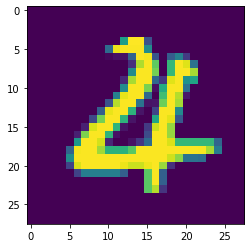

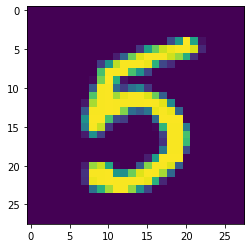

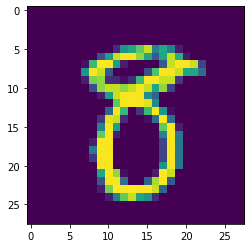

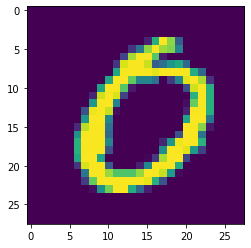

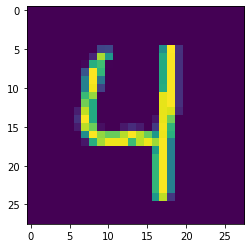

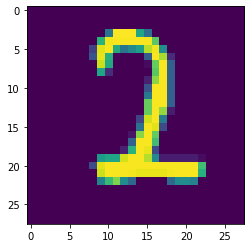

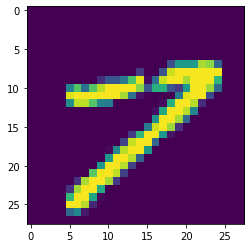

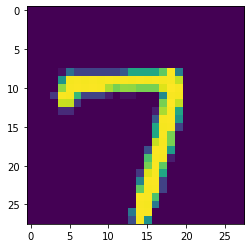

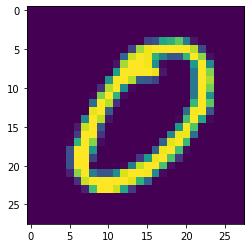

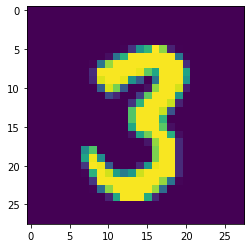

In [157]:
for i in range(0,10):
    plt.imshow(x_train[i].reshape(28,28))
    plt.show()

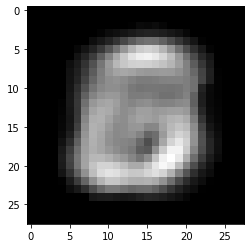

In [158]:
plt.imshow(pre_out.reshape(28,28), cmap='gray')

In [159]:
for i in range(0,10):
    pre_out1 = oneModel.predict(x_val[i].reshape(-1, 784)
    plt.imshow(pre_out1.reshape(28,28))   

SyntaxError: invalid syntax (3052360792.py, line 3)